In [1]:
import injest
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

url = "../Run 19 Logs Copy/"

print('Building Data...')

date_dirs = injest.chldrn_labeled_with_date(url)

# All data is stored in the channels dictionary
channels = injest.injest_date_dirs(date_dirs)

Building Data...
Parsing ../Run 19 Logs Copy/23-04-27
Parsing ../Run 19 Logs Copy/23-04-18
Parsing ../Run 19 Logs Copy/23-04-20
Parsing ../Run 19 Logs Copy/23-04-16
Parsing ../Run 19 Logs Copy/23-04-17
Parsing ../Run 19 Logs Copy/23-04-28


/Users/simon/projects/nagylab/databridge/injest.py:70: UserWarning: The file ../Run 19 Logs Copy/23-04-28/.DS_Store is not of the form "[name] 23-04-28.log" and will be ignored
  warnings.warn(f'The file {entry.path} is not of the form "[name] {date}.log" and will be ignored')


Parsing ../Run 19 Logs Copy/23-04-21
Parsing ../Run 19 Logs Copy/23-04-26
Parsing ../Run 19 Logs Copy/23-04-19
Parsing ../Run 19 Logs Copy/23-04-23
Parsing ../Run 19 Logs Copy/23-04-24
Parsing ../Run 19 Logs Copy/23-04-15
Parsing ../Run 19 Logs Copy/23-04-14
Parsing ../Run 19 Logs Copy/23-04-25
Parsing ../Run 19 Logs Copy/23-04-22
Preparing...


In [3]:
for c in channels:
    if (c.startswith('Status')): print(c)
    # if (c.startswith('Status')): print(f"http://localhost:8080/{c}")

In [4]:
df = channels["status/tc400spdswptatt_2"].data
df['value'] = df['value'].astype('float')

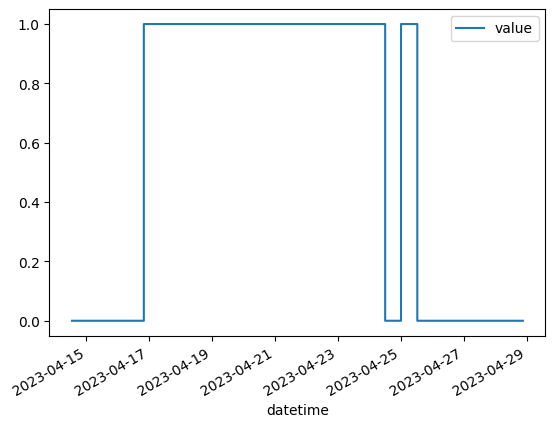

In [5]:
# reference plot
df.plot();

                     value
datetime                  
2023-04-14 13:10:39    0.0
2023-04-16 20:00:06    0.0
2023-04-16 20:00:16    1.0
2023-04-24 12:08:46    1.0
2023-04-24 12:08:56    0.0
2023-04-25 00:14:54    0.0
2023-04-25 00:15:04    1.0
2023-04-25 12:40:04    1.0
2023-04-25 12:40:14    0.0
2023-04-28 21:14:18    0.0
                     value
datetime                  
2023-04-14 13:10:39    0.0
2023-04-16 20:00:06    0.0
2023-04-16 20:00:16    1.0
2023-04-24 12:08:46    1.0
2023-04-24 12:08:56    0.0
2023-04-25 00:14:54    0.0
2023-04-25 00:15:04    1.0
2023-04-25 12:40:04    1.0
2023-04-25 12:40:14    0.0
2023-04-28 21:14:18    0.0


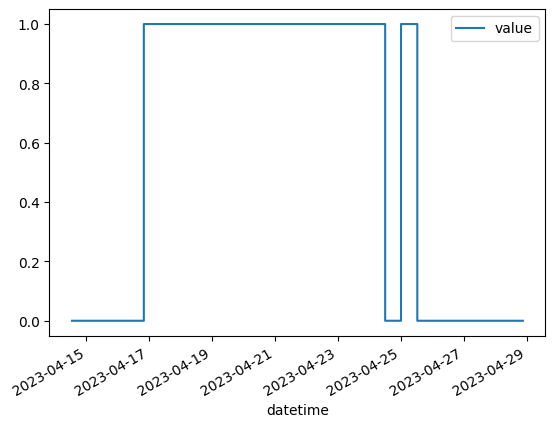

In [6]:
unique = ((df != df.shift(1)) | (df != df.shift(-1)))['value']
df[unique].plot()
print(df)
print(df[unique])

status/ctrl_pres_ok
OG: 5
filtered: 5


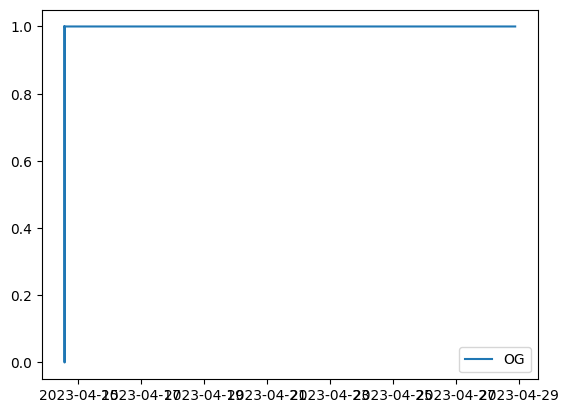

status/ctrl_pres
OG: 2
filtered: 2


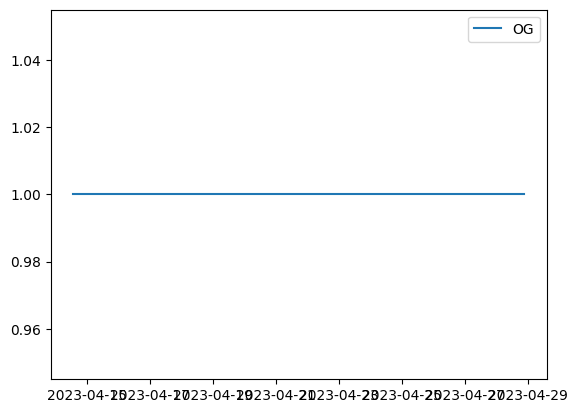

status/cpastate
OG: 21
filtered: 21


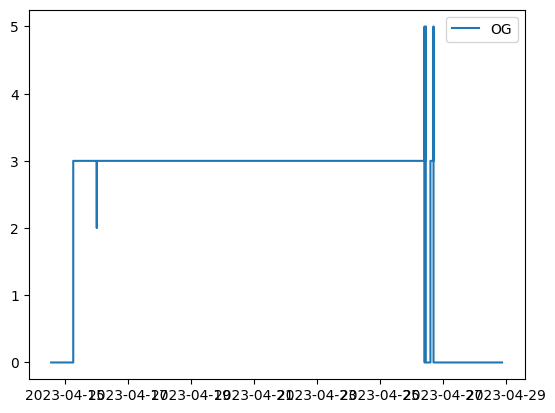

status/cparun
OG: 17
filtered: 17


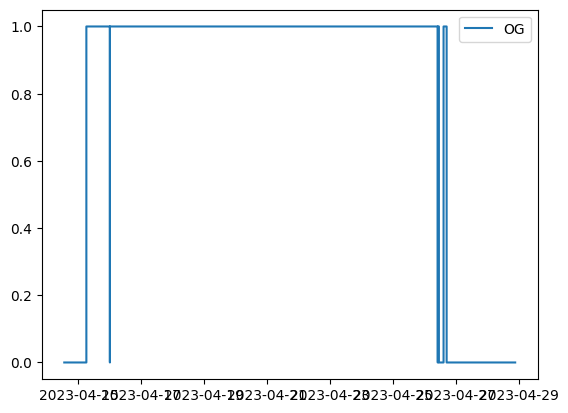

status/cpawarn
OG: 2
filtered: 2


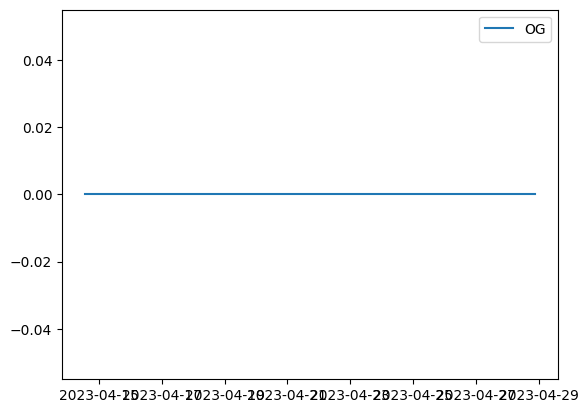

status/cpaerr
OG: 5
filtered: 5


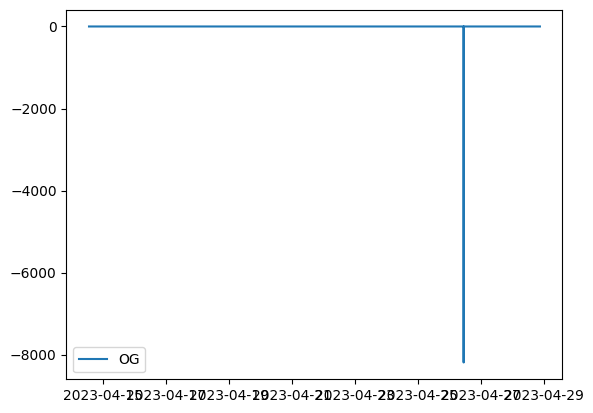

status/cpatempwi
OG: 158412
filtered: 158412


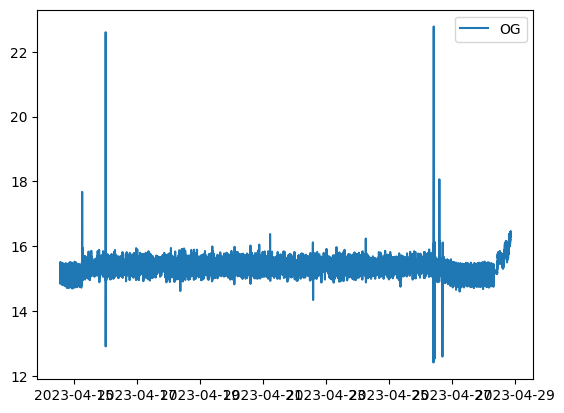

status/cpatempwo
OG: 125954
filtered: 125954


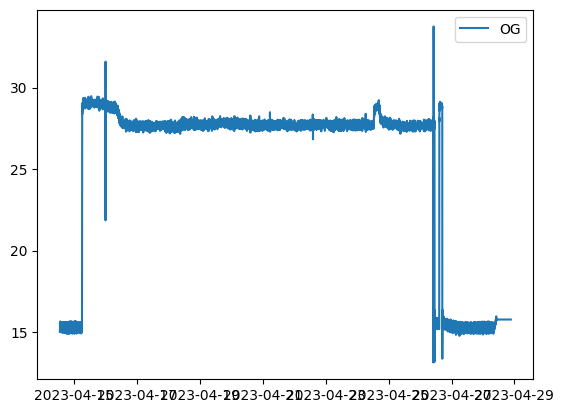

status/cpatempo
OG: 118289
filtered: 118289


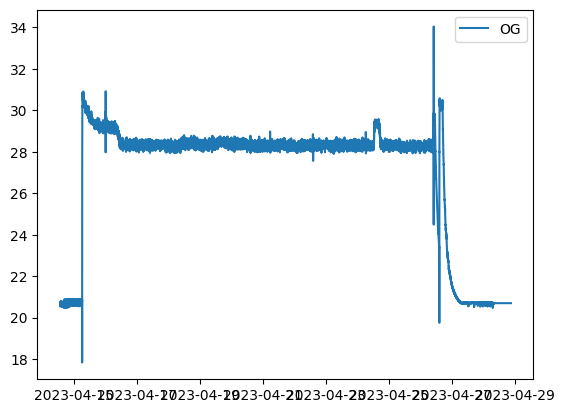

status/cpatemph
OG: 118343
filtered: 118343


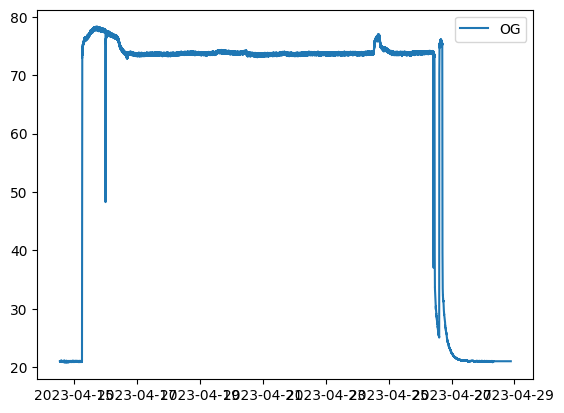

status/cpalp
OG: 118654
filtered: 118654


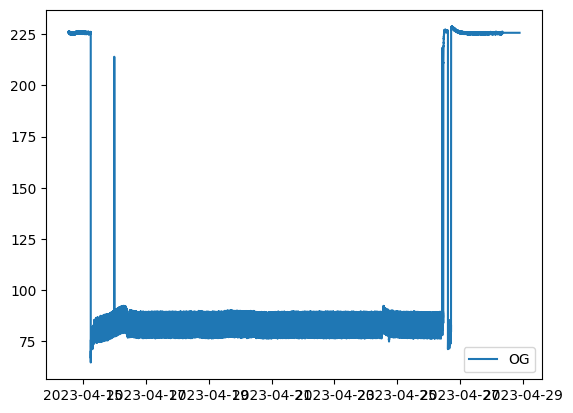

status/cpalpa
OG: 118599
filtered: 118599


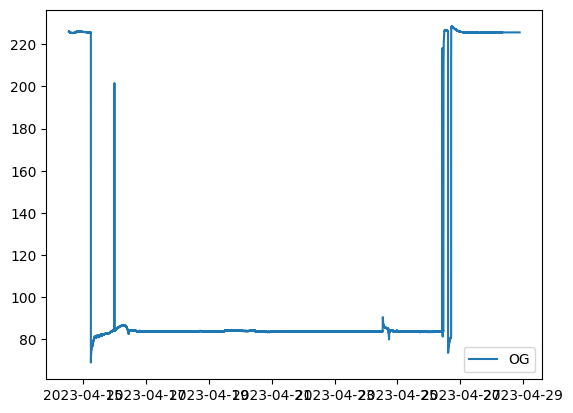

status/cpahp
OG: 118547
filtered: 118547


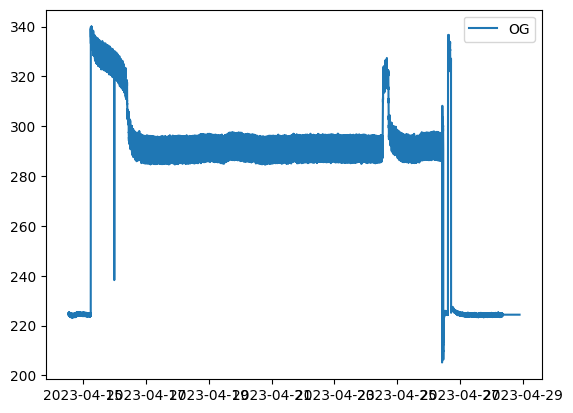

status/cpahpa
OG: 118488
filtered: 118488


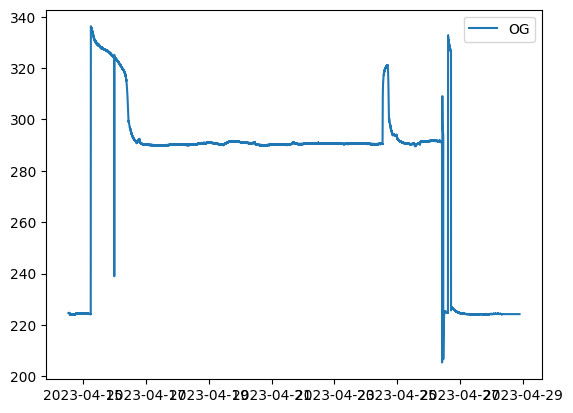

status/cpadp
OG: 118457
filtered: 118457


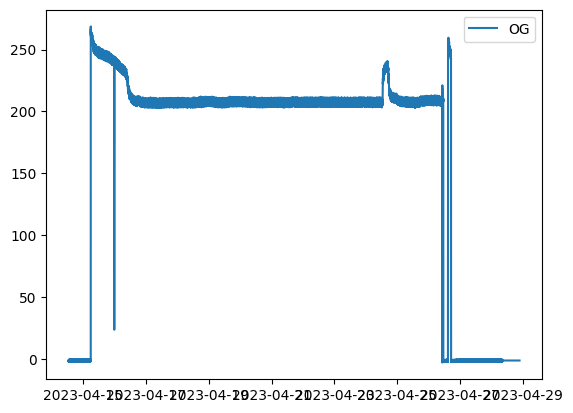

status/cpacurrent
OG: 118726
filtered: 118726


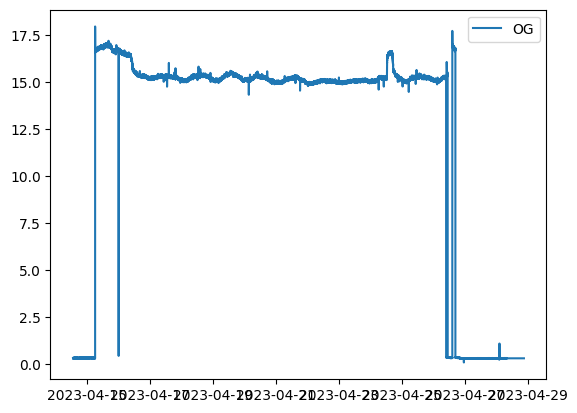

status/cpahours
OG: 5422
filtered: 5422


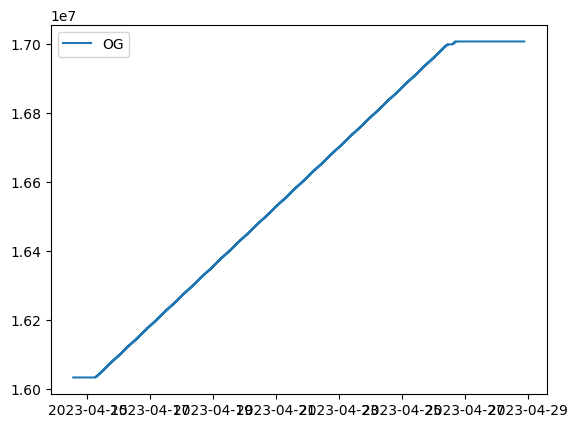

status/cpascale
OG: 2
filtered: 2


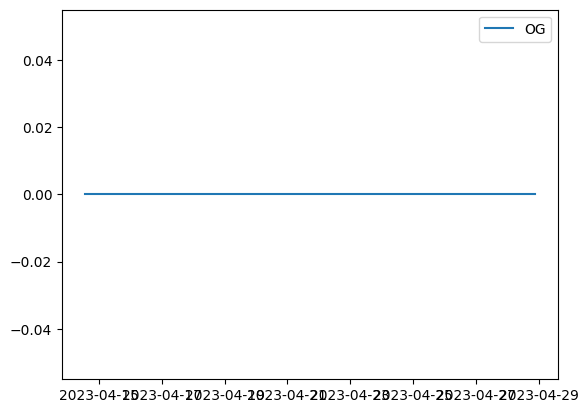

status/cpasn
OG: 2
filtered: 2


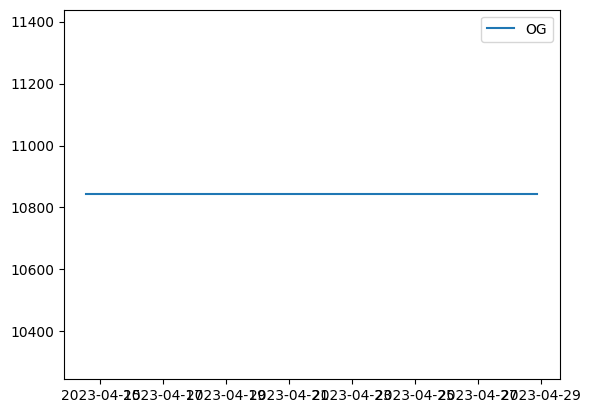

status/ctr_pressure_ok
OG: 5
filtered: 5


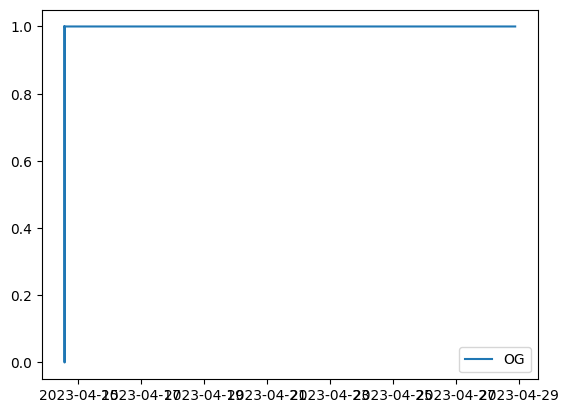

status/tc400actualspd
OG: 5329
filtered: 5329


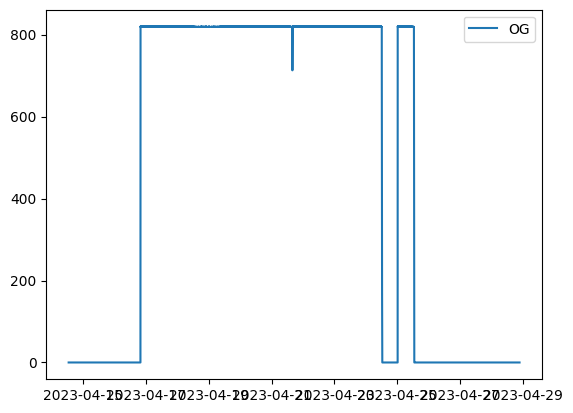

status/tc400drvpower
OG: 8118
filtered: 8118


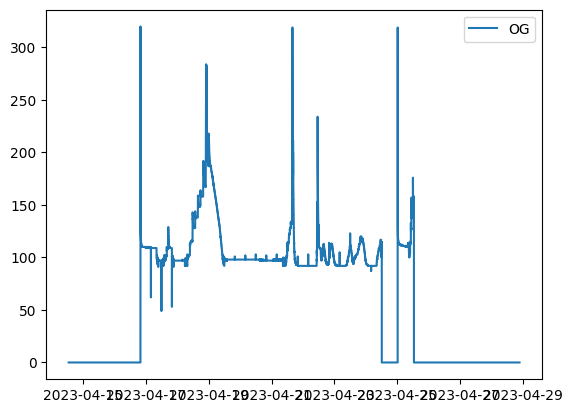

status/tc400ovtempelec
OG: 2
filtered: 2


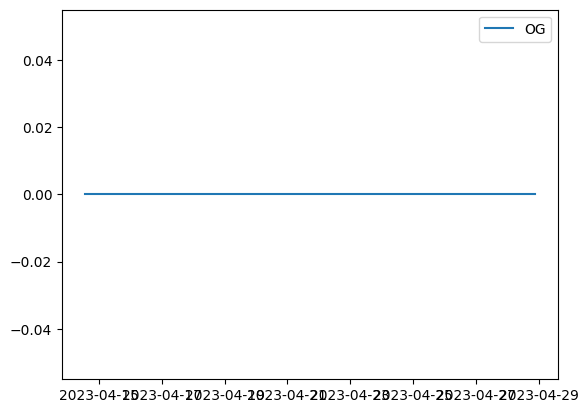

status/tc400ovtemppum
OG: 2
filtered: 2


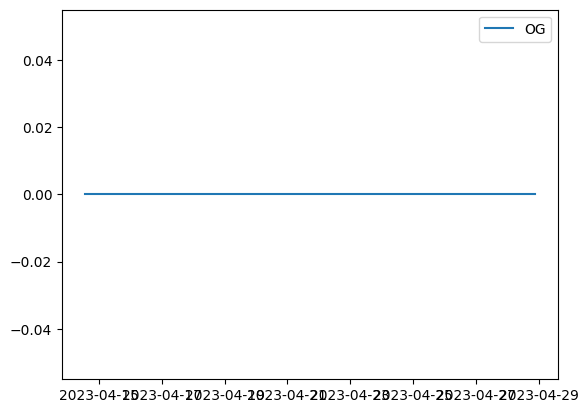

status/tc400heating
OG: 2
filtered: 2


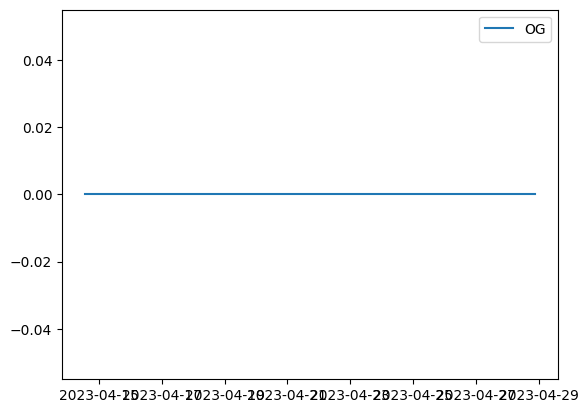

status/tc400pumpaccel
OG: 14
filtered: 14


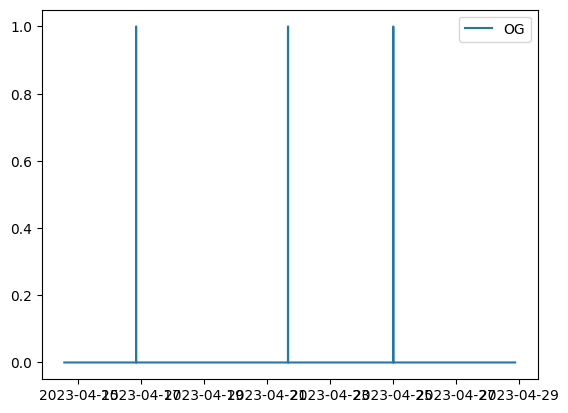

status/tc400pumpstatn
OG: 5
filtered: 5


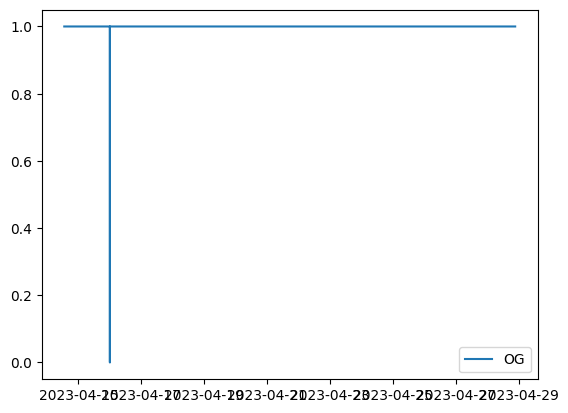

status/tc400remoteprio
OG: 5
filtered: 5


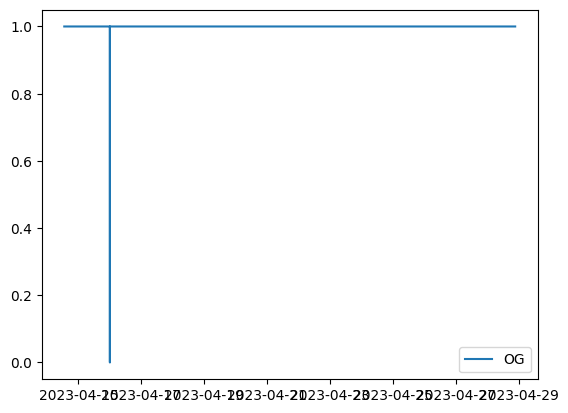

status/tc400spdswptatt
OG: 10
filtered: 10


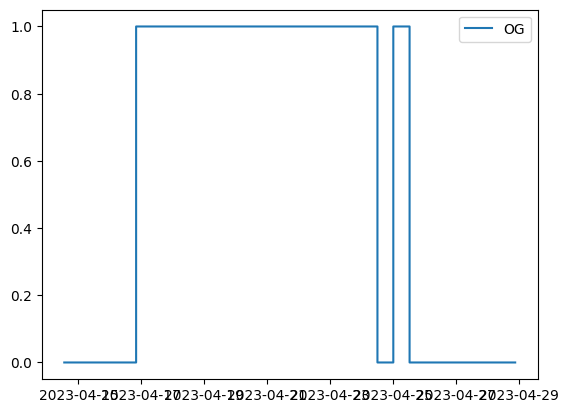

status/tc400setspdatt
OG: 14
filtered: 14


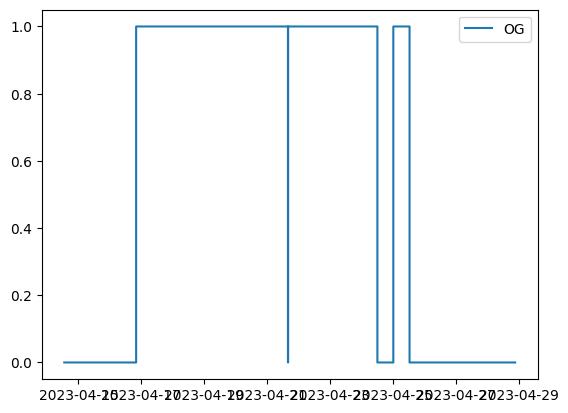

status/tc400standby
OG: 2
filtered: 2


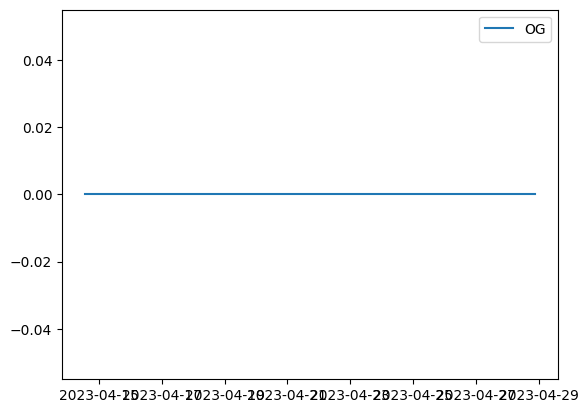

status/tc400actualspd_2
OG: 9616
filtered: 9616


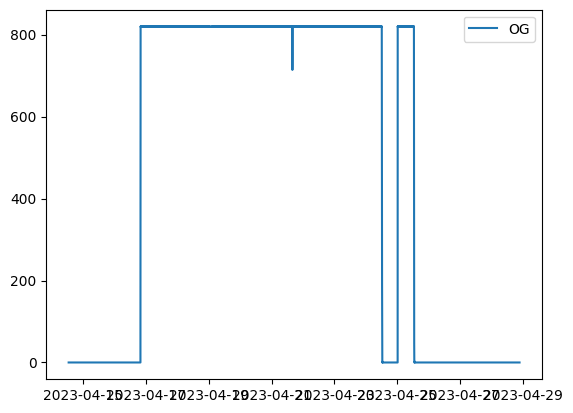

status/tc400ovtempelec_2
OG: 2
filtered: 2


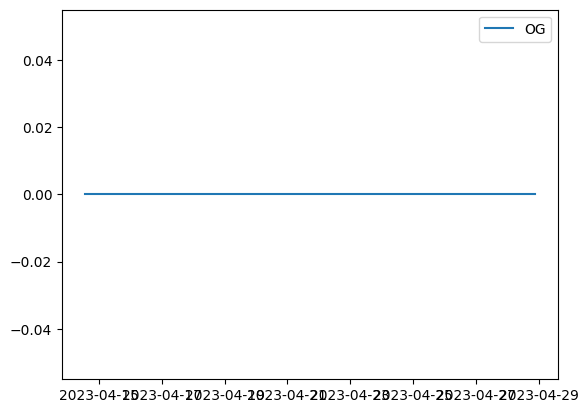

status/tc400ovtemppum_2
OG: 2
filtered: 2


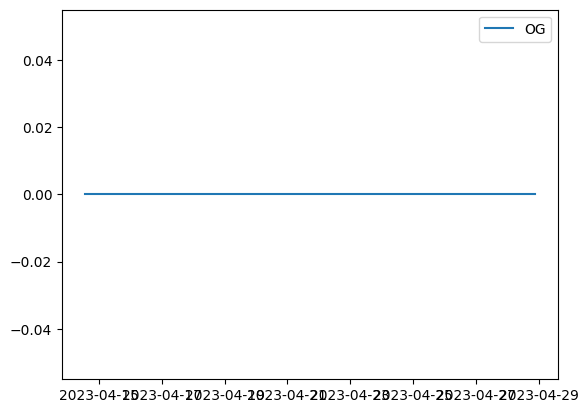

status/tc400heating_2
OG: 2
filtered: 2


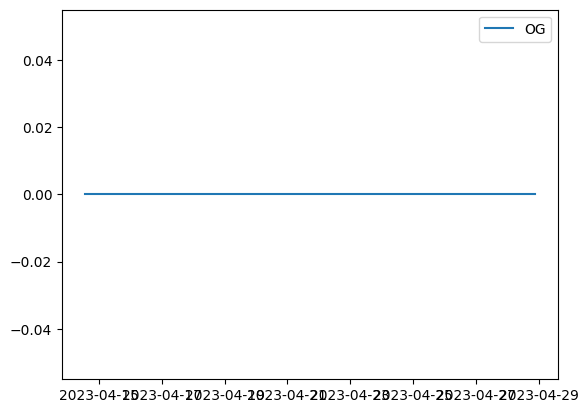

status/tc400pumpaccel_2
OG: 14
filtered: 14


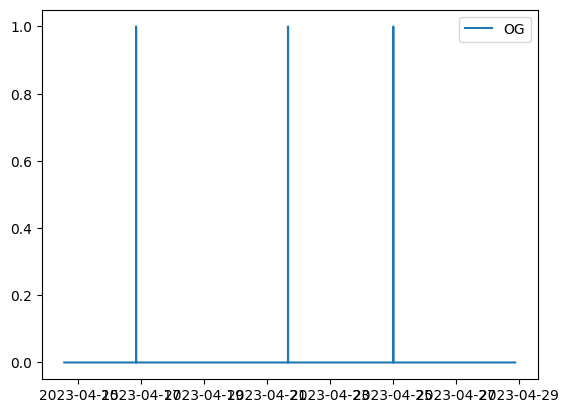

status/tc400pumpstatn_2
OG: 5
filtered: 5


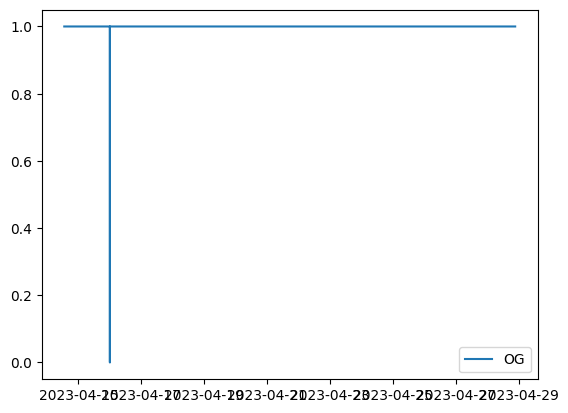

status/tc400remoteprio_2
OG: 5
filtered: 5


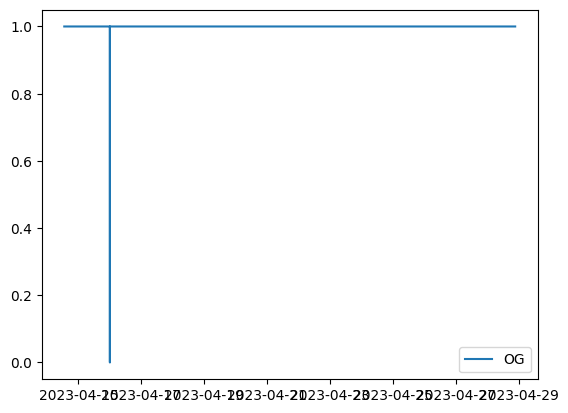

status/tc400spdswptatt_2
OG: 10
filtered: 10


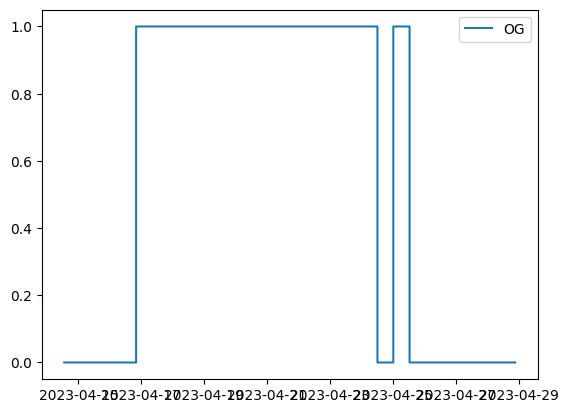

status/tc400setspdatt_2
OG: 14
filtered: 14


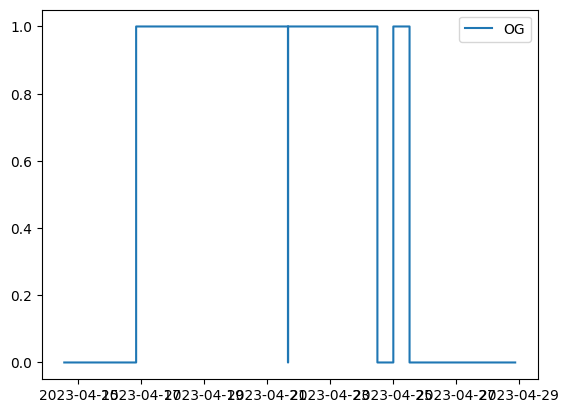

status/tc400standby_2
OG: 2
filtered: 2


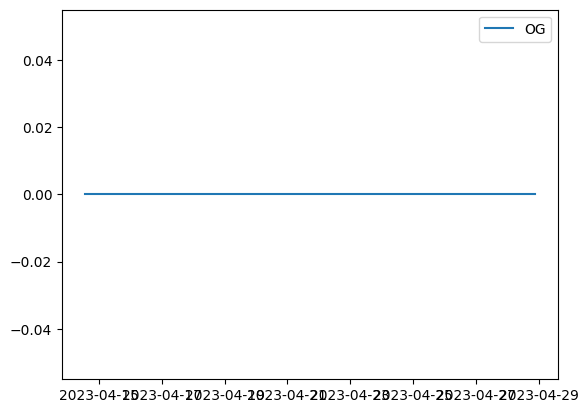

In [7]:
for c in channels:
    if (c.startswith('status')):
        df = channels[c].data
        df['value'] = df['value'].astype('float')

        unique = ((df != df.shift(1)) | (df != df.shift(-1)))['value']
        
        print(c)
        print(f"OG: {df.size}")
        print(f"filtered: {df[unique].size}")

        fig, ax = plt.subplots()
        ax.plot(df, label="OG")
        # ax.plot(df[unique], label="Filtered")
        ax.legend()
        plt.show()


In [8]:
df = channels['status/tc400spdswptatt_2'].data

In [19]:
start = "2023-04-23T11:32:47"
print('start', start)
end = "2023-04-25T11:35:01"
print('end', end)
print()

print(df)

full_data = df

results = full_data[start:end]

if (results.size == 0): results = full_data

datetime_index = results.index


first_dt = datetime_index[0]
last_dt = datetime_index[-1]

s = max(df.index.get_loc(first_dt) - 1, 0)
e = min(df.index.get_loc(last_dt) + 1, len(df.index) - 1)

results = df[s:e + 1]

print()
print(df[start:end])

results = results[::3]

print()

new_last_dt = results.index[-1]
print('new_last_dt', new_last_dt)
desired_last_dt = df.index[e]
print('desired_last_dt', desired_last_dt)
if (new_last_dt != desired_last_dt): results = pd.concat((results, df[e:e+1]))


print(results)

start 2023-04-23T11:32:47
end 2023-04-25T11:35:01

                     value  test
datetime                        
2023-04-14 13:10:39    0.0   0.0
2023-04-16 20:00:06    0.0   0.0
2023-04-16 20:00:16    1.0   1.0
2023-04-24 12:08:46    1.0   1.0
2023-04-24 12:08:56    0.0   0.0
2023-04-25 00:14:54    0.0   0.0
2023-04-25 00:15:04    1.0   1.0
2023-04-25 12:40:04    1.0   1.0
2023-04-25 12:40:14    0.0   0.0
2023-04-28 21:14:18    0.0   0.0


AttributeError: 'DataFrame' object has no attribute 'rows'